In [1]:
import tensorflow as tf

tf.random.set_seed(42)

2026-02-14 17:04:49.330051: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-14 17:04:49.352059: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-14 17:04:50.010269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-14 17:04:55.002959: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
# understand the effect of changing dtype here

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=tf.float16)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=tf.float16)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# note the "metrics" parameter is for display, only "loss" what matters
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

print("Starting training...")
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5, verbose=1)


2026-02-14 17:05:13.053237: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2026-02-14 17:05:13.157799: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


Starting training...
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 17.4437 - mae: 17.4437
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 17.1624 - mae: 17.1624
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 16.8812 - mae: 16.8812
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 16.5999 - mae: 16.5999
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 16.3187 - mae: 16.3187


Epoch 1/100


/home/abood/major_proj/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7060  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6227 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5798 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5671 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5490 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5335
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5153
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5090 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5038 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5007 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4998
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4971 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4934 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4917 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4914 
Epoch 16/100
4/4 ━━━━━━━━━━━━━

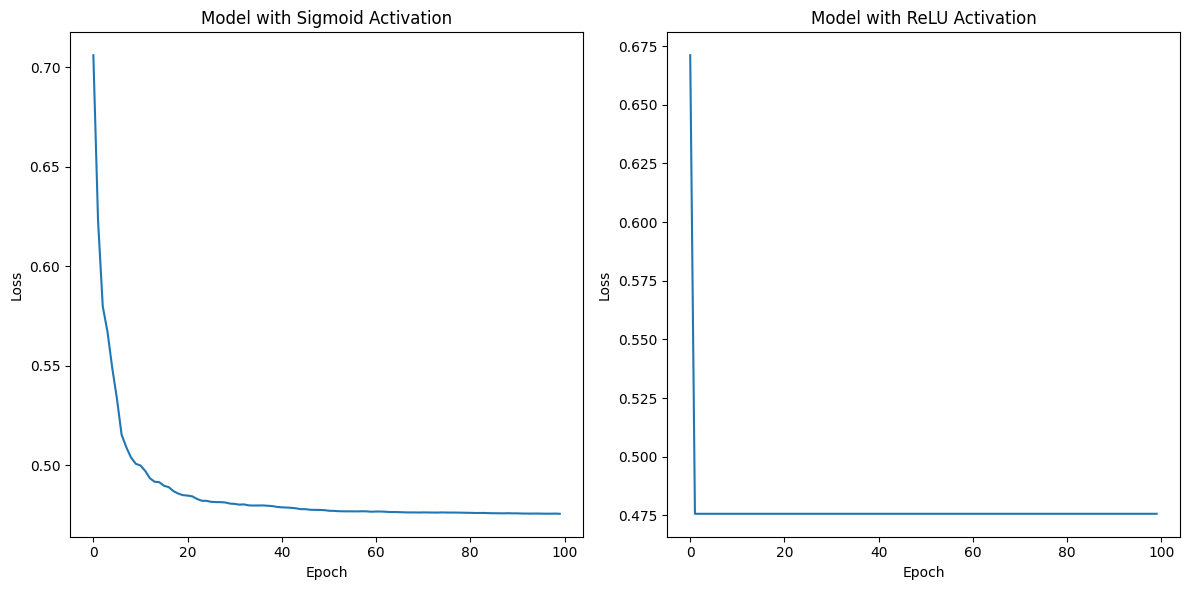

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Function that creates a simple multilayer perceptron model with provided activation function as argument
def create_model(activation):
    model = Sequential()
    model.add(Dense(10, activation=activation, input_shape=(1,)))
    model.add(Dense(10, activation=activation))
    model.add(Dense(1, activation=activation))
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1))
    return model

# Generate input data
X = np.linspace(-10, 10, 100)
y = np.sin(X)

# Train the model
sigmoid = create_model("sigmoid")
history_sigmoid = sigmoid.fit(X, y, epochs=100, verbose=1)

relu = create_model("relu")
history_relu = relu.fit(X, y, epochs=100, verbose=0)

# Plot the model performance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model with Sigmoid Activation')

plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model with ReLU Activation')

plt.tight_layout()
plt.show()